In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/vishurudratrainer/notebooks/main/deathrate.csv")

In [8]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,997.875
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289


In [9]:
from sklearn.preprocessing import LabelEncoder

<Axes: >

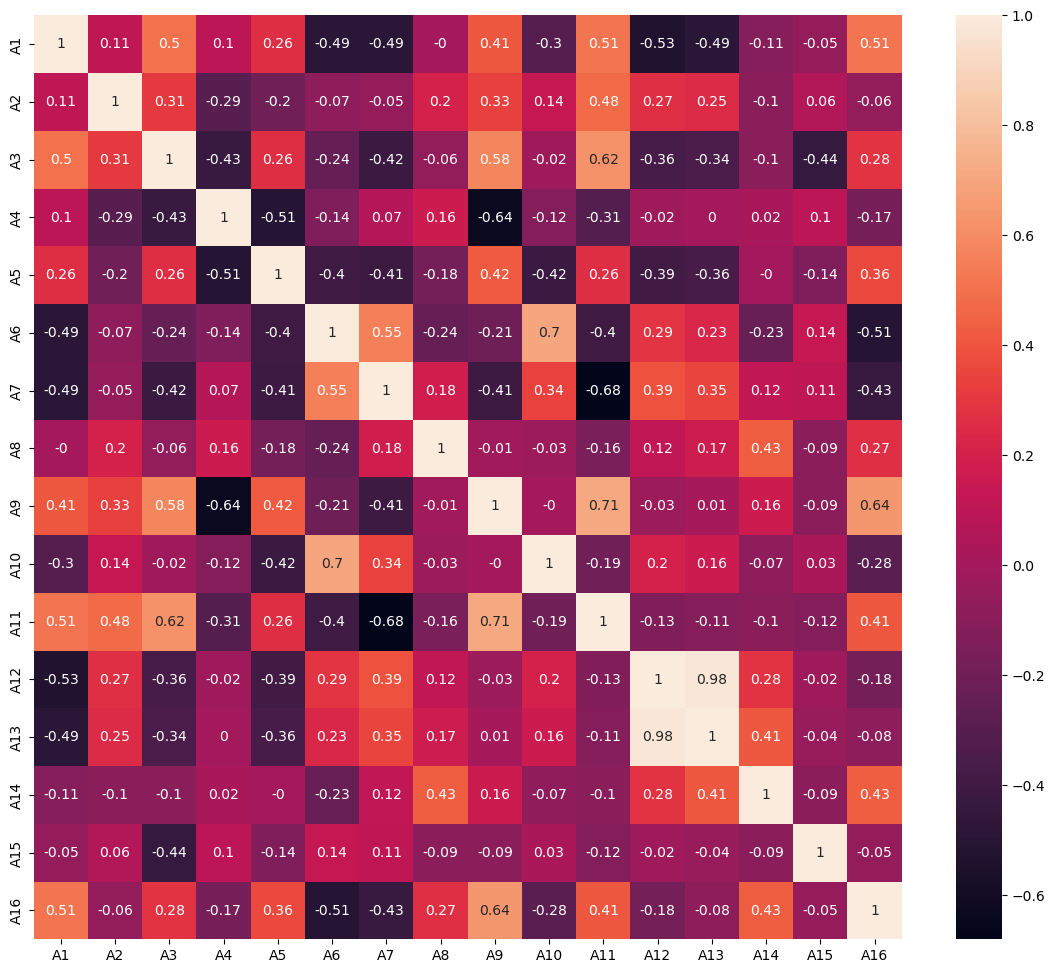

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(14, 12))  
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'A16')

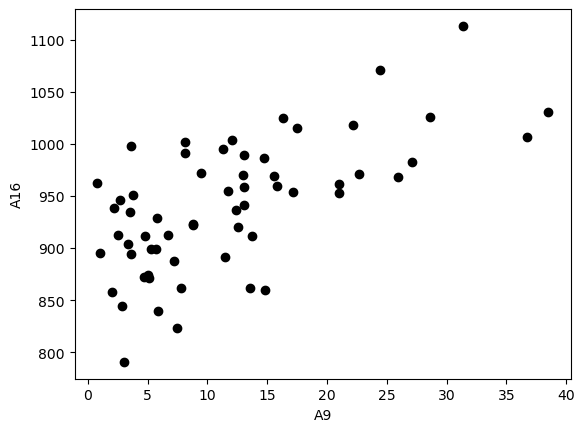

In [13]:
plt.scatter(df['A9'], df['A16'], color='black')
plt.xlabel('A9')
plt.ylabel('A16')

In [35]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df[['A9']], df['A16'], random_state=0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)  # Model is generated here
y_pred = lm.predict(X_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result.head()
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))

1792.0678553772168


In [36]:
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))  
print("R2: {:.2f}".format(r2_score(y_test, y_pred)))

MSE: 1792.07
R2: 0.48


In [24]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [37]:
import statsmodels.api as sm

In [41]:
model = sm.OLS(X_train, y_train).fit()

In [42]:
y_pred = model.predict(X_test)

In [43]:
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result.head()
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))

908892.4513843057


In [44]:
result.head()

,actual,predicted
26,919.729,0.157836
35,923.234,0.110235
59,954.442,0.146562
28,861.833,0.097708
11,1024.885,0.204185


In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     A9   R-squared (uncentered):                   0.690
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              97.93
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                    9.21e-13
Time:                        17:21:01   Log-Likelihood:                         -156.75
No. Observations:                  45   AIC:                                      315.5
Df Residuals:                      44   BIC:                                      317.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A16            0.0125      0.001      9.896      0.000       0.010       0.015
==============================================================================
Omnibus:                       14.773   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.114
Skew:                           1.281   Prob(JB):                     0.000317
Kurtosis:                       4.425   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""